In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
C:\Users\nospm\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
from pathlib import Path
csvpath = Path('./data/gold_price.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')
df.head()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481


In [5]:
df['Return'] = df['USD (PM)'].pct_change() * 100
df['Lagged_Return'] = df.Return.shift()
df = df.dropna()
df.head()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM),Return,Lagged_Return
Date,,,,,,,,
2001-01-04,268.75,267.1,178.869,178.352,282.538,282.049,-0.018716,-1.457027
2001-01-05,268.00,267.4,178.488,178.148,280.775,280.882,0.112317,-0.018716
2001-01-08,268.60,268.3,178.769,178.664,282.410,282.481,0.336574,0.112317
2001-01-09,267.75,267.0,179.855,179.195,284.507,283.590,-0.484532,0.336574
2001-01-10,266.70,266.3,178.777,178.665,283.573,283.298,-0.262172,-0.484532


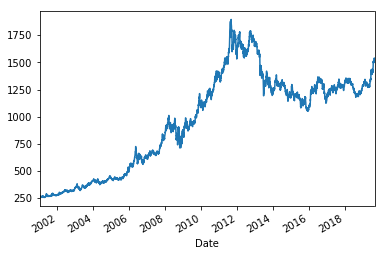

In [6]:
df['USD (PM)'].plot()

# Train Test Split Predictions

Training Period: 2001-2018
Testing Period: 2019

In [7]:
# Create a train/test split for the data using 2001-2018 for training and 2019 for testing
train = df.loc['2001':'2018']
test = df.loc['2019']

In [8]:
# Create train and test sets for dependent and independent variables
x_train = train['Lagged_Return'].to_frame()
x_test = test['Lagged_Return'].to_frame()

y_train = train['Return']
y_test = test['Return']

In [9]:
# Create and fit model to the data, make predictions
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [10]:
predictions = model.predict(x_test)

In [13]:
out_of_sample_results = y_test.to_frame()
out_of_sample_results['Predicted Return'] = predictions
out_of_sample_results.head()

,Return,Predicted Return
Date,,
2019-01-02,0.304926,0.040971
2019-01-03,0.588510,0.040540
2019-01-04,-0.817544,0.040140
2019-01-07,0.961013,0.042124
2019-01-08,-0.444978,0.039615


In [9]:
# Construct a DataFrame using just the "y" training data:
y_df = y_train

# Add a column of "out-of-sample" predictions to that DataFrame:  
# y_df['out-of-sample'] = 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf5038a310>,
      dtype=object)

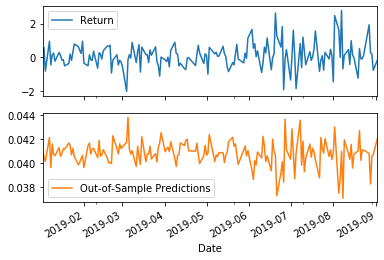

In [10]:
# Plot the out-of-sample results for 2019
out_of_sample_results.plot(subplots=True)

In [9]:
# Calculate out-of-sample mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!

# Calculate out-of-sample root mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!
print(f"Out-of-sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")

Out-of-sample Root Mean Squared Error (RMSE): 0.7386178760826811


---

# Rolling Out-of-Sample Predictions

In [10]:
# Split the index into weekly periods
weeks = df.index.to_period("w").unique()
print(weeks[0])

2001-01-01/2001-01-07


In [11]:
# Declare the training window of 12 weeks
# Define the time frame of rolling windows
# YOUR CODE HERE!

962


In [12]:
# Construct empty placeholder DataFrames.
# (During each iteration of the loop, we'll append that week"s predictions to this DataFrame)
all_predictions = pd.DataFrame(columns=["Out-of-Sample Predictions"])
all_actuals = pd.DataFrame(columns=["Actual Returns"])

In [13]:
# During rolling iteration, split into train and test sets.
# Use linear regression to make out-of-sample predictions.
# Append the results to external DataFrames.
# YOUR CODE HERE!

In [14]:
Results = pd.concat([all_actuals, all_predictions], axis=1)
Results.head()

,Actual Returns,Out-of-Sample Predictions
2001-04-02,-0.679084,-0.230810
2001-04-03,0.449307,-0.178308
2001-04-04,0.914041,0.047224
2001-04-05,-0.520331,0.140111
2001-04-06,0.271213,-0.146578


In [15]:
# 2019 Data
results_2019 = Results.loc['2019':]
results_2019

,Actual Returns,Out-of-Sample Predictions
2019-01-02,0.304926,0.113681
2019-01-03,0.588510,0.136012
2019-01-04,-0.817544,0.156779
2019-01-07,0.961013,0.029540
2019-01-08,-0.444978,0.173015
...,...,...
2019-08-27,1.938423,0.267097
2019-08-28,0.273982,0.082971
2019-08-29,0.198419,0.251182
2019-08-30,-0.766134,0.258819


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb248dc8c10>,
      dtype=object)

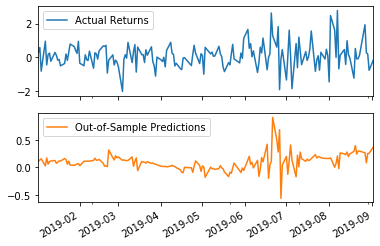

In [16]:
# Plot the 2019 results
# YOUR CODE HERE!

In [17]:
# Out-of-sample metrics
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# (Hint: use the DataFrame above)
# YOUR CODE HERE!

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
# YOUR CODE HERE!
print(f"Rolling Out-of-Sample Root Mean Squared Error (RMSE): {rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 0.7516414806096019
